In [3]:
#Normal Equation
import numpy as np
np.random.seed(42) #make it reproducible
X = 2 * np.random.rand(100,1) #generating random data between 0 and 2 and 100 instances
y = 4 + 3 * X + np.random.randn(100,1) # adding guassian noise

from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [4]:
theta_best #can't recover exact parameters of the original function due to noise

array([[4.21509616],
       [2.77011339]])

In [5]:
#predictions using theta_best
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) #add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

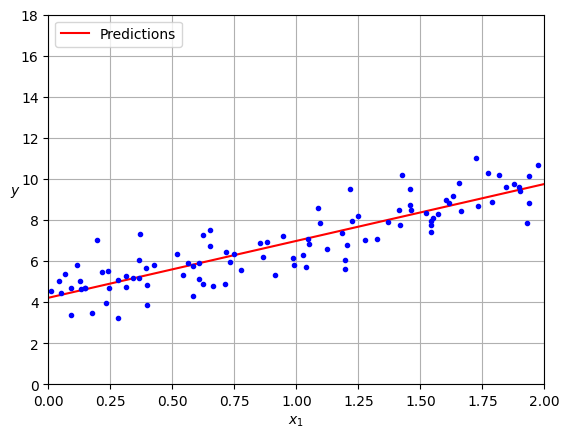

In [ ]:
#plot the model's preds
import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,'r-',label="Predictions")
plt.plot(X,y,'b.')
plt.axis([0,2,0,18])
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [9]:
#performing linear reg using scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
#lr class is based on scipy.linalg.lstsq() function
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd,residuals,rank,s

(array([[4.21509616],
        [2.77011339]]),
 array([80.6584564]),
 2,
 array([14.37020392,  4.11961067]))

In [12]:
#psuedoinverse function(use when matrix is not invertible)
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Insights:
1) The pseudoinverse itself is computed using a standard matrix factorization
technique called Singular Value Decomposition (SVD) that can decompose
the training set matrix X into the matrix multiplication of three matrices U Σ
V.T (see numpy.linalg.svd())
2) The pseudoinverse is computed as
X+ = V(Σ.+)U⊺
. To compute the matrix Σ+, the algorithm takes Σ and sets
to zero all values smaller than a tiny threshold value, then it replaces all the
nonzero values with their inverse, and finally it transposes the resulting
matrix. This approach is more efficient than computing the Normal
Equation, plus it handles edge cases nicely.
3)  the Normal Equation
may not work if the matrix (X.T)X is not invertible (i.e., singular), such as if m
< n or if some features are redundant, but the pseudoinverse is always
defined.

# Computational complexity
1) The Normal Equation computes the inverse of X.T X, which is an (n + 1) × (n + 1) matrix (where n is the number of features).
2) The computational
complexity of inverting such a matrix is typically about O(n ) to O(n ),
depending on the implementation.
3) The SVD approach used by Scikit-Learn’s LinearRegression class is about
O(n ). 

> Warning: Both the Normal Equation and the SVD approach get very slow when the number of
features grows large (e.g., 100,000). On the positive side, both are linear with regard to
the number of instances in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.

4) Faster predictions once trained.

5) m is the number of training instances and n is the number of
features

# Gradient Descent: 
1) When Large number of features or too many training instances to fit in memory.
2) Suppose you are lost in the mountains in a dense fog, and you can only feel
the slope of the ground below your feet. A good strategy to get to the bottom
of the valley quickly is to go downhill in the direction of the steepest slope.
This is exactly what Gradient Descent does: it measures the local gradient of
the error function with regard to the parameter vector θ, and it goes in the
direction of descending gradient. Once the gradient is zero, you have reached
a minimum!
3) you start by filling θ with random values (this is called random
initialization). Then you improve it gradually, taking one baby step at a time,
each step attempting to decrease the cost function (e.g., the MSE), until the
algorithm converges to a minimum.
4) An important parameter in Gradient Descent is the size of the steps,
determined by the learning rate hyperparameter.
5) MSE for lr model is convex function(no local minima, just 1 global minimum).

>WARNING:
When using Gradient Descent, you should ensure that all features have a similar scale
(e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to
converge.

# Batch Gradient Descent

1) To implement Gradient Descent, you need to compute the gradient of the
cost function with regard to each model parameter θ .
This is called a partial derivative. It is like asking “What is
the slope of the mountain under my feet if I face east?” and then asking the
same question facing north.

>WARNING:
Notice that this formula involves calculations over the full training set X, at each
Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it
uses the whole batch of training data at every step (actually, Full Gradient Descent
would probably be a better name). As a result it is terribly slow on very large training
sets (but we will see much faster Gradient Descent algorithms shortly). However,
Gradient Descent scales well with the number of features; training a Linear Regression
model when there are hundreds of thousands of features is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition.

2) The gradient vector, noted
∇ MSE(θ), contains all the partial derivatives of the cost function (one for
each model parameter). Once you have the gradient vector, which points uphill, just go in the
opposite direction to go downhill. 
θ(next step) = θ − η∇θ MSE(θ).

3) you may want to limit the number of iterations so that grid search
can eliminate models that take too long to converge.
how to set no. of iterations: A simple solution is to set a very large number of iterations but to
interrupt the algorithm when the gradient vector becomes tiny—that is, when
its norm becomes smaller than a tiny number ϵ (called the tolerance)—
because this happens when Gradient Descent has (almost) reached the
minimum.

>CONVERGENCE RATE:
When the cost function is convex and its slope does not change abruptly
(as is the case for the MSE cost function), Batch Gradient Descent with a
fixed learning rate will eventually converge to the optimal solution, but
you may have to wait a while: it can take O(1/ϵ) iterations to reach the
optimum within a range of ϵ, depending on the shape of the cost
function. If you divide the tolerance by 10 to have a more precise
solution, then the algorithm may have to run about 10 times longer.


4) Batch Gradient Descent is the fact that it uses the
whole training set to compute the gradients at every step, which makes it
very slow when the training set is large.

In [15]:
#implementation of Batch GD from scratch
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.21509616],
       [2.77011339]])

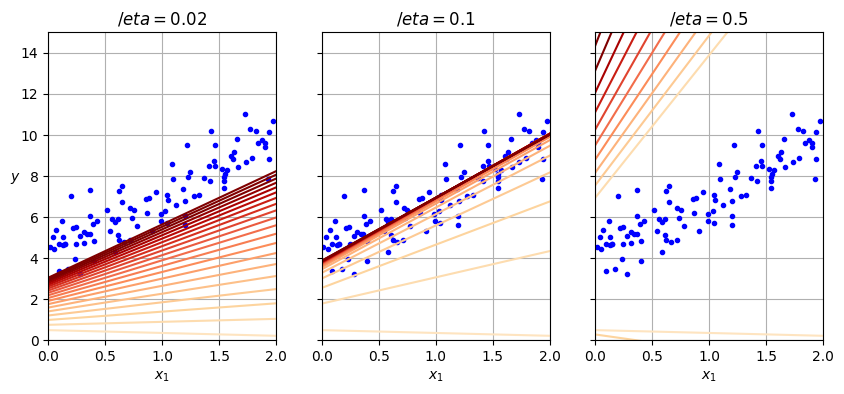

In [18]:
# ploting GD
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15))
            plt.plot(X_new,y_predict,linestyle="solid",color=color)
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)

    plt.xlabel("$x_1$")
    plt.axis([0,2,0,15])
    plt.grid()
    plt.title(fr"$/eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0)

plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta,eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta,eta=0.5)
plt.show()

# Stochastic Gradient Descent:

1) Stochastic
Gradient Descent picks a random instance in the training set at every step
and computes the gradients based only on that single instance. Obviously,
working on a single instance at a time makes the algorithm much faster
because it has very little data to manipulate at every iteration. It also makes
it possible to train on huge training sets, since only one instance needs to be
in memory at each iteration(out of core learning).

2)  instead of gently
decreasing until it reaches the minimum, the cost function will bounce up
and down, decreasing only on average.  So once the algorithm stops, the final
parameter values are good, but not optimal.

3) less regular than batch gradient descent hence if cost function is very irregular then it helps. randomness is good to escape from local optima, but bad because
it means that the algorithm can never settle at the minimum. One solution to
this dilemma is to gradually reduce the learning rate. The steps start out
large (which helps make quick progress and escape local minima), then get
smaller and smaller, allowing the algorithm to settle at the global minimum.
This process is akin to simulated annealing.The function that determines the learning rate at each iteration is
called the learning schedule. 

>WARNING:
When using Stochastic Gradient Descent, the training instances must be independent
and identically distributed (IID) to ensure that the parameters get pulled toward the
global optimum, on average. A simple way to ensure this is to shuffle the instances
during training (e.g., pick each instance randomly, or shuffle the training set at the
beginning of each epoch). If you do not shuffle the instances—for example, if the
instances are sorted by label—then SGD will start by optimizing for one label, then the
next, and so on, and it will not settle close to the global minimum.

In [20]:
theta_path_sgd = [] #for plotting

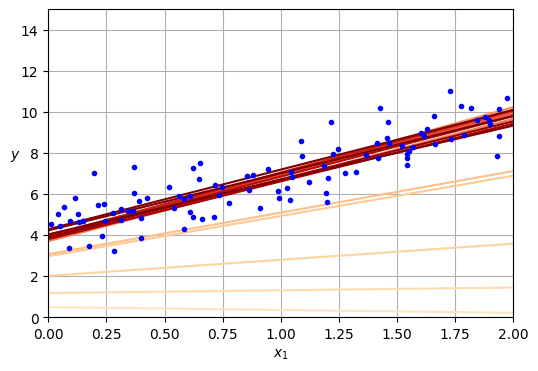

'By convention we iterate by rounds of m iterations; each round is called an\nepoch. While the Batch Gradient Descent code iterated 1,000 times through\nthe whole training set, this code goes through the training set only 50 times\nand reaches a pretty good solution'

In [21]:
# implementing stochastic gradient descent from scratch
n_epochs = 50
t0,t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

n_shown = 20 #nuber of epochs to show
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
    for i in range(m):

        # for generating figure:
        if epoch==0 and i<n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(i/n_shown + 0.15))
            plt.plot(X_new,y_predict,linestyle="solid",color=color)


        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()
"""By convention we iterate by rounds of m iterations; each round is called an
epoch. While the Batch Gradient Descent code iterated 1,000 times through
the whole training set, this code goes through the training set only 50 times
and reaches a pretty good solution"""

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel()) # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42)

In [23]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.15474433]), array([2.82564538]))

# Mini-batch gradient Descent

1) Mini-batch GD computes the gradients on small
random sets of instances called mini-batches. The main advantage of Minibatch GD over Stochastic GD is that you can get a performance boost from
hardware optimization of matrix operations, especially when using GPUs.

2) The algorithm’s progress in parameter space is less erratic than with
Stochastic GD, especially with fairly large mini-batches. As a result, Minibatch GD will end up walking around a bit closer to the minimum than
Stochastic GD—but it may be harder for it to escape from local minima (in
the case of problems that suffer from local minima, unlike Linear
Regression)

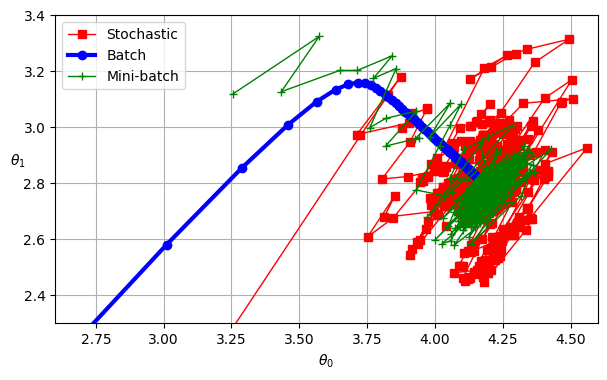

In [26]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m/minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

t0,t1 = 200,1000 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta_path_mgd = []
for  epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0,n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx: idx + minibatch_size]
        yi = y_shuffled[idx: idx + minibatch_size]
        gradients = 2/minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,
         label="Stochastic")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth=3,
         label="Batch")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=1,
         label="Mini-batch")

plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$",rotation=0)
plt.axis([2.6,4.6,2.3,3.4])
plt.grid()
plt.show()

In [1]:
"""By default, Scikit-learn's SGDRegressor uses mini-batch gradient descent. We control the batch size with 
the tol parameter (tolerance) and the n_iter_no_change parameter to influence the number of mini-batches."""

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([5, 6, 7, 8])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


reg = SGDRegressor(learning_rate='constant',eta0=0.01,max_iter=1000,tol=1e-3)
reg.fit(X_train,y_train)


y_preds = reg.predict(X_test)

# Model parameters
print("Mini-Batch GD Coefficients:", reg.coef_)
print("Mini-Batch GD Intercept:", reg.intercept_)

Mini-Batch GD Coefficients: [1.08007852 1.20389664]
Mini-Batch GD Intercept: [1.08047486]


# Comparison of algos for linear reg

Algorithm | Large m | Out-of-core support | Large n | Hyperparams | Scaling required | scikit-learn
<br>Normal Equation |Fast  |No  |slow  |0  |No  |N\A
<br>SVD    |Fast  |No  |slow  |0  |No  |Linear Regression
<br>Batch GD  |slow  |no  |Fast  |2  |Yes  |SGDRegressor
<br>Stochastic GD  |Fast  |yes  |Fast  |>=2  |Yes  |SGDRegressor
<br>Mini-batch GD  |Fast  |Yes  |Fast  |>=2  |Yes  |SGDRegressor

>Note: There is almost no difference after training: all these algorithms end up with very
similar models and make predictions in exactly the same way.

